# Analysis of masterdata

In [1]:
#this Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import io
import requests

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [3]:
pd.set_option('display.max_columns', None)
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()    
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [4]:
df=pd.read_csv("data/master")

# convert from fahrenheit to celsius; 
for x in ["temp","min","max"]:
    df[x]=(df[x]-32)*(5/9)

# rolling mean of temperature and cases  
for x in ["temp","min","max","new_cases_per_million"]:
    new_col=df.groupby('country',as_index=False)[x].rolling(3).mean()
    new_col=new_col.reset_index(level=0, drop=True)
    df[str(x+"_roll")]=new_col
df=df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df["new_cases_per_million"]=round(df.new_cases_per_million)
df = movecol(df, 
             cols_to_move=["day_from_jan_first","mo","da"], 
             ref_col='date',
             place='After')
df.head()

,iso_code,continent,country,date,day_from_jan_first,mo,da,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Unnamed: 0.1.1,STN,temp,min,max,stp,slp,dewp,wdsp,prcp,fog,call,lat,lon,elev,rh,ah,Distance,lat_st,long_st,temp_roll,min_roll,max_roll,new_cases_per_million_roll
0,ALB,Europe,Albania,2020-03-09,69,3,9,2.0,2.0,0.0,0.0,0.695,1.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.11,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,1919982,789540-00408,26.722222,23.000000,29.000000,999.9,NaN,69.1,14.9,99.99,1,TBPB,13.067,-59.483,52.1,0.689169,0.198197,7133.169839,13.067,-59.483,NaN,NaN,NaN,NaN
1,ALB,Europe,Albania,2020-03-10,70,3,10,6.0,4.0,0.0,0.0,2.085,1.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.67,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,1919983,789540-00408,26.111111,23.500000,29.722222,999.9,NaN,69.3,14.7,99.99,1,TBPB,13.067,-59.483,52.1,0.719751,0.204243,7133.169839,13.067,-59.483,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2020-03-11,71,3,11,10.0,4.0,0.0,0.0,3.475,1.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,1357450,789540-00408,26.666667,23.388889,29.722222,6.0,1013.7,67.2,14.6,0.00,0,TBPB,13.067,-59.483,52.1,0.647314,0.185931,7133.169839,13.067,-59.483,26.500000,23.296296,29.481481,1.158333
3,ALB,Europe,Albania,2020-03-12,72,3,12,11.0,1.0,1.0,1.0,3.822,0.0,0.347,0.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.85,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,1735491,789540-00408,26.500000,24.000000,29.500000,4.7,1012.4,68.8,14.1,99.99,1,TBPB,13.067,-59.483,52.1,0.691152,0.197794,7133.169839,13.067,-59.483,26.425926,23.629630,29.648148,1.042333
4,ALB,Europe,Albania,2020-03-13,73,3,13,23.0,12.0,1.0,0.0,7.992,4.0,0.347,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.70,2877800.0,104.871,38.0,13.188,8.643,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,1919984,789540-00408,26.722222,25.000000,30.000000,999.9,NaN,69.5,15.1,99.99,1,TBPB,13.067,-59.483,52.1,0.698762,0.200955,7133.169839,13.067,-59.483,26.629630,24.129630,29.740741,1.969000


In [5]:
d=df.groupby(['country']).size().to_dict()


l=[]
for key in l: 
    if d[key]==181:
        print(key)
        d.append(key)
l
        

In [5]:
df[df.country.isin(["Germany","Italy"])]

,iso_code,continent,country,date,day_from_jan_first,mo,da,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Unnamed: 0.1.1,STN,temp,min,max,stp,slp,dewp,wdsp,prcp,fog,call,lat,lon,elev,rh,ah,Distance,lat_st,long_st,temp_roll,min_roll,max_roll,new_cases_per_million_roll
1638,DEU,Europe,Germany,2020-01-01,1,1,1,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1602173,727033-14609,-3.000000,-4.388889,-1.000000,976.9,994.3,22.1,5.9,0.61,1,KHUL,46.119,-67.793,145.1,0.828819,-0.293496,5920.989010,46.119,-67.793,NaN,NaN,NaN,NaN
1639,DEU,Europe,Germany,2020-01-02,2,1,2,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1411434,727033-14609,-1.555556,-6.722222,0.000000,985.0,1003.0,21.8,6.9,0.00,0,KHUL,46.119,-67.793,145.1,0.735497,-0.558913,5920.989010,46.119,-67.793,NaN,NaN,NaN,NaN
1640,DEU,Europe,Germany,2020-01-03,3,1,3,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1602174,727033-14609,-0.166667,-6.722222,2.777778,987.1,1004.8,26.4,4.4,0.00,1,KHUL,46.119,-67.793,145.1,0.805222,-6.321567,5920.989010,46.119,-67.793,-1.574074,-5.944444,0.592593,0.000000
1641,DEU,Europe,Germany,2020-01-04,4,1,4,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1934530,727033-14609,1.111111,-4.388889,3.277778,987.4,1005.1,29.0,2.9,0.00,1,KHUL,46.119,-67.793,145.1,0.816921,1.055216,5920.989010,46.119,-67.793,-0.203704,-5.944444,2.018519,0.000000
1642,DEU,Europe,Germany,2020-01-05,5,1,5,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1411435,727033-14609,-3.055556,-8.277778,3.277778,982.7,1001.1,21.7,8.5,0.03,1,KHUL,46.119,-67.793,145.1,0.818329,-0.283339,5920.989010,46.119,-67.793,-0.703704,-6.462963,3.111111,0.000000
1643,DEU,Europe,Germany,2020-01-06,6,1,6,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1602175,727033-14609,-9.611111,-12.777778,-1.111111,993.4,1011.7,6.6,5.4,0.01,1,KHUL,46.119,-67.793,145.1,0.698181,-0.046585,5920.989010,46.119,-67.793,-3.851852,-8.481481,1.814815,0.000000
1644,DEU,Europe,Germany,2020-01-07,7,1,7,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1602176,727033-14609,-7.944444,-13.277778,-2.222222,994.4,1013.4,12.3,2.3,0.01,1,KHUL,46.119,-67.793,145.1,0.790685,-0.072670,5920.989010,46.119,-67.793,-6.870370,-11.444444,-0.018519,0.000000
1645,DEU,Europe,Germany,2020-01-08,8,1,8,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,1602177,727033-14609,-9.888889,-14.388889,-2.222222,991.1,1010.8,10.3,1.3,0.00,1,KHUL,46.119,-67.793,145.1,0.842209,-0.053439,5920.989010,46.119,-67.793,-9.148148,-13.481481,-1.851852,0.000000
1646,DEU,Europe,Germany,2020-01-09,9,1,9,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.13

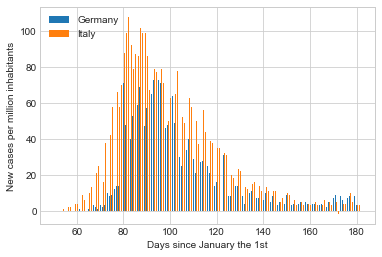

In [6]:
df_ger=df[(df.country=="Germany") & (df.day_from_jan_first>50) ]
df_ita=df[(df.country=="Italy")& (df.day_from_jan_first>50)]
plt.bar(x=df_ger.day_from_jan_first, height=df_ger.new_cases_per_million,width=0.3,label="Germany")
plt.bar(x=df_ita.day_from_jan_first+0.3, height=df_ita.new_cases_per_million,width=0.3,label="Italy")
plt.legend(loc="upper left")#plt.show()
plt.ylabel('New cases per million inhabitants', fontsize=10)
plt.xlabel('Days since January the 1st', fontsize=10)
plt.savefig('plots/new_cases_ger_ita.png',dpi=300)
plt.savefig('C:/Users/Jost/Desktop/Master/Masterarbeit/TeX/plots/new_cases_ger_ita.png',dpi=300)


In [7]:
df_ger

,iso_code,continent,country,date,day_from_jan_first,mo,da,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Unnamed: 0.1.1,STN,temp,min,max,stp,slp,dewp,wdsp,prcp,fog,call,lat,lon,elev,rh,ah,Distance,lat_st,long_st,temp_roll,min_roll,max_roll,new_cases_per_million_roll
1688,DEU,Europe,Germany,2020-02-20,51,2,20,15.0,0.0,0.0,0.0,0.179,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411462,727033-14609,-14.444444,-20.000000,-8.888889,5.2,1023.9,-10.3,7.9,0.02,0,KHUL,46.119,-67.793,145.1,0.464395,-0.014009,5920.98901,46.119,-67.793,-11.259259,-19.055556,-2.759259,1.156482e-18
1689,DEU,Europe,Germany,2020-02-21,52,2,21,15.0,0.0,0.0,0.0,0.179,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411463,727033-14609,-18.222222,-33.888889,-5.611111,8.1,1027.2,-16.1,3.8,0.00,0,KHUL,46.119,-67.793,145.1,0.476364,-0.008331,5920.98901,46.119,-67.793,-11.666667,-20.555556,-4.259259,1.156482e-18
1690,DEU,Europe,Germany,2020-02-22,53,2,22,15.0,0.0,0.0,0.0,0.179,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411464,727033-14609,-5.777778,-11.722222,2.222222,997.1,1015.5,6.4,7.8,0.00,0,KHUL,46.119,-67.793,145.1,0.514675,-0.076795,5920.98901,46.119,-67.793,-12.814815,-21.870370,-4.092593,1.156482e-18
1691,DEU,Europe,Germany,2020-02-23,54,2,23,15.0,0.0,0.0,0.0,0.179,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411465,727033-14609,-0.666667,-11.722222,6.722222,998.2,1016.3,18.8,6.2,0.00,0,KHUL,46.119,-67.793,145.1,0.606676,-1.148104,5920.98901,46.119,-67.793,-8.222222,-19.111111,1.111111,1.156482e-18
1692,DEU,Europe,Germany,2020-02-24,55,2,24,15.0,0.0,0.0,0.0,0.179,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411466,727033-14609,0.333333,-10.611111,9.388889,996.5,1014.5,22.2,4.3,0.00,0,KHUL,46.119,-67.793,145.1,0.651677,2.652614,5920.98901,46.119,-67.793,-2.037037,-11.351852,6.111111,1.156482e-18
1693,DEU,Europe,Germany,2020-02-25,56,2,25,15.0,0.0,0.0,0.0,0.179,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411467,727033-14609,1.444444,-10.611111,9.388889,995.6,1013.5,23.8,2.1,0.00,0,KHUL,46.119,-67.793,145.1,0.643260,0.654661,5920.98901,46.119,-67.793,0.370370,-10.981481,8.500000,1.156482e-18
1694,DEU,Europe,Germany,2020-02-26,57,2,26,17.0,2.0,0.0,0.0,0.203,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411468,727033-14609,-0.388889,-6.722222,7.777778,998.8,1016.8,21.7,3.6,0.00,0,KHUL,46.119,-67.793,145.1,0.672457,-2.226236,5920.98901,46.119,-67.793,0.462963,-9.314815,8.851852,8.000000e-03
1695,DEU,Europe,Germany,2020-02-27,58,2,27,21.0,4.0,0.0,0.0,0.251,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.67,83783945.0,237.016,46.6,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.0,81.33,1411469,727033-14609,-1.000000,-6.722222,5.000000,989.8,1012.9,22.4,11.7,0.00,1,KHUL,46.119,-67.793,145.1,0.724203,-0.891681,5920.98901,46.119,-67.793,0.018519,-8.018519,7.388889,2.400000e-02
1696,DEU,Europe,Germany,2020-02-28,59,2,28,47.0,26.0,0.0,0.0,0.561,0.0,0

In [8]:
df[df.population>5000000]

,iso_code,continent,country,date,day_from_jan_first,mo,da,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Unnamed: 0.1.1,STN,temp,min,max,stp,slp,dewp,wdsp,prcp,fog,call,lat,lon,elev,rh,ah,Distance,lat_st,long_st,temp_roll,min_roll,max_roll,new_cases_per_million_roll
221,AUT,Europe,Austria,2020-01-01,1,1,1,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1735484,789540-00408,27.277778,25.222222,31.000000,6.5,1014.0,70.0,12.1,99.99,1,TBPB,13.067,-59.483,52.1,0.687808,0.200288,6667.647276,13.067,-59.483,NaN,NaN,NaN,NaN
222,AUT,Europe,Austria,2020-01-02,2,1,2,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1357429,789540-00408,27.444444,25.222222,30.000000,6.5,1014.2,69.2,13.7,0.00,0,TBPB,13.067,-59.483,52.1,0.662490,0.193649,6667.647276,13.067,-59.483,NaN,NaN,NaN,NaN
223,AUT,Europe,Austria,2020-01-03,3,1,3,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1357430,789540-00408,27.500000,25.222222,31.000000,7.8,1015.5,69.8,9.8,0.00,0,TBPB,13.067,-59.483,52.1,0.674135,0.197304,6667.647276,13.067,-59.483,27.407407,25.222222,30.666667,0.000000
224,AUT,Europe,Austria,2020-01-04,4,1,4,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1919945,789540-00408,26.722222,23.722222,30.000000,999.9,NaN,69.4,9.9,99.99,1,TBPB,13.067,-59.483,52.1,0.696353,0.200262,6667.647276,13.067,-59.483,27.222222,24.722222,30.333333,0.000000
225,AUT,Europe,Austria,2020-01-05,5,1,5,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1919946,789540-00408,26.000000,22.000000,30.000000,6.9,1014.6,69.2,9.5,99.99,1,TBPB,13.067,-59.483,52.1,0.722056,0.204408,6667.647276,13.067,-59.483,26.740741,23.648148,30.333333,0.000000
226,AUT,Europe,Austria,2020-01-06,6,1,6,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1919947,789540-00408,26.277778,22.611111,30.000000,6.0,1013.8,70.7,12.7,0.32,1,TBPB,13.067,-59.483,52.1,0.747835,0.212979,6667.647276,13.067,-59.483,26.333333,22.777778,30.000000,0.000000
227,AUT,Europe,Austria,2020-01-07,7,1,7,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1919948,789540-00408,26.944444,24.111111,30.000000,6.6,1014.3,67.7,13.3,0.00,1,TBPB,13.067,-59.483,52.1,0.647872,0.187245,6667.647276,13.067,-59.483,26.407407,22.907407,30.000000,0.000000
228,AUT,Europe,Austria,2020-01-08,8,1,8,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,1735485,789540-00408,27.055556,25.222222,30.000000,8.3,1016.0,69.7,16.2,99.99,1,TBPB,13.067,-59.483,52.1,0.689777,0.199854,6667.647276,13.067,-59.483,26.759259,23.981481,30.000000,0.000000
229,AUT,Europe,Austria,2020-01-09,9,1,9,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,9006400.0,106.749,44.4,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,191

In [9]:
#Adjust for country-specific start points of covid outbreak. A country should at least have 5 infected per million
df=df[(df.total_cases_per_million>5) & (df.population>5000000)]
df.country.unique()

array(['Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Finland', 'Germany',
       'Greece', 'Hungary', 'Italy', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russia', 'Serbia', 'Slovakia', 'Spain', 'Sweden',
       'Switzerland', 'Ukraine'], dtype=object)

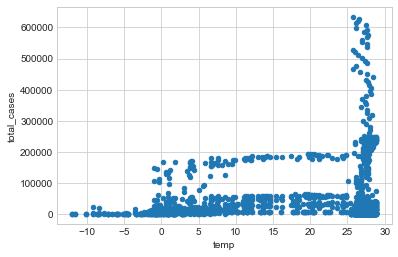

In [10]:
# First glance at dependency of temp and cases

df.plot.scatter(x='temp', y='total_cases')

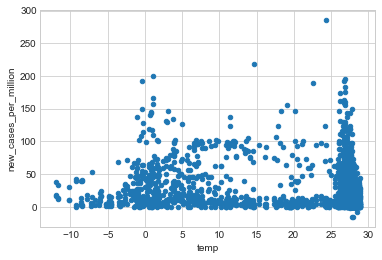

In [11]:
df.plot.scatter(x='temp', y='new_cases_per_million')

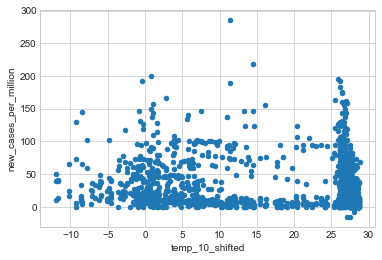

In [12]:
# lag the variable temp

df['temp_10_shifted'] = df.groupby(['country'])['temp'].shift(10)
df.plot.scatter(x='temp_10_shifted', y='new_cases_per_million')

In [13]:
df[(df['temp']>25) & (df['new_cases_per_million']>200)]

,iso_code,continent,country,date,day_from_jan_first,mo,da,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Unnamed: 0.1.1,STN,temp,min,max,stp,slp,dewp,wdsp,prcp,fog,call,lat,lon,elev,rh,ah,Distance,lat_st,long_st,temp_roll,min_roll,max_roll,new_cases_per_million_roll,temp_10_shifted


In [14]:
t_y=df['new_cases_per_million'][(df['new_cases_per_million']>=0) & (df['new_cases_per_million']<200) ]
t_x=df['temp_10_shifted'][(df['new_cases_per_million']>=0) & (df['new_cases_per_million']<200) ]
t_x.head()

287   NaN
288   NaN
289   NaN
290   NaN
291   NaN
Name: temp_10_shifted, dtype: float64

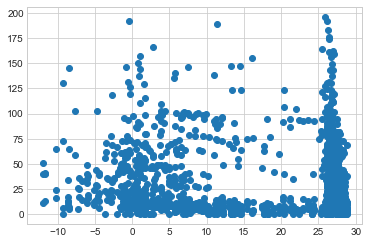

In [15]:
plt.scatter(t_x,t_y)